<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Models/blob/main/Digits_Recognition_MLP_and_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IMPORT DATASET OF DIGITS
from sklearn.datasets import load_digits

In [3]:
# DOWNLOAD DATASET OF DIGITS 8X8 PIXELS 10 CLASSES
data = load_digits(n_class=10)

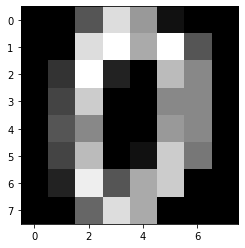

In [4]:
# SHOW ONE EXAMPLE OF DATASET
plt.imshow(data.images[0], 'gray')
plt.show()

In [5]:
# FILTERING DATA AND SCALE, INCRESING WHITE VALUES
data_fil = 60*data.data ** 0.5

In [6]:
# IMPORT PRINCIPAL COMPONENTS ALGORITHM
from sklearn.decomposition import PCA

In [7]:
# REDUCING DIMENTIONS TO USE MULTILAYER PERCEPTRON
pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(data_fil)

# SHOW NEW SHAPE OF DATA 
converted_data.shape

(1797, 2)

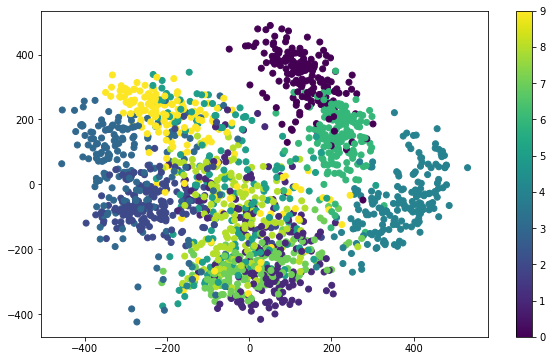

In [8]:
# PLOTTING DATA MAPPED IN 2 DIMENTIONS  (matrix) [[1,2,2,1,1],[1,3,4,2,1]] -> (1,2) (point)
plt.figure(figsize = (10,6))
plt.scatter(converted_data[:,0],converted_data[:,1] , c = data.target)
plt.colorbar()
plt.show()

In [9]:
# IMPORT MODULE TO SPLIT DATA IN TRAINING AND TESTING
from sklearn.model_selection import train_test_split

In [10]:
# IMPORT MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier

In [11]:
# LIBRARy TO COMPUTE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [12]:
# CLEAR OUTPUT IN COLAB
from google.colab import output

In [13]:
# DEFINE WHERE BEST ACCURACY WILL BE SAVED TO CHOOSE BEST CLASSIFIER
best_score = 0
scores = []
Corr_Matrix = np.zeros((10,10))

for i in range(50):

  # 50% OF DATA FOR TESTING AND 50% FOR TRAINING
  (X_train, X_test, y_train, y_test) = train_test_split(converted_data, 
                                                        data.target,
                                                        random_state = i)
  # CREATE MULTI-LAYER PERCEPTRON CLASSIFIER
  clf = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=100,
                    hidden_layer_sizes=(15,15), random_state = i)
  
  # TRAINING
  clf.fit(X_train, y_train)
  
  # SCORE ACCURACY OF CLASSIFIER
  score = clf.score(X_test, y_test)
  scores.append(score)

  # IF CURRENT SCORE IS MAJOR OF BEST SCORE, SAVE AS NEW BEST SCORE
  if score > best_score:
    best_score = score
    best_clf = clf

  # GET PREDICTIONS
  predicted = clf.predict(X_test)
  
  # CONFUSION MATRIX COEFICIENTS
  corr = confusion_matrix(y_test, predicted)

  # ADD CONFUSION MATRIX WITH TOTAL VALUES
  Corr_Matrix += corr

output.clear()
print('FINISHED')

FINISHED


In [14]:
print('Best Score: ', best_score)

Best Score:  0.6222222222222222


In [15]:
print('Mean Score: ', np.mean(scores))

Mean Score:  0.5585333333333333


In [16]:
# IMPORTING FUNCTION TO PLOT CONFUSION MATRIX
from mlxtend.plotting import plot_confusion_matrix

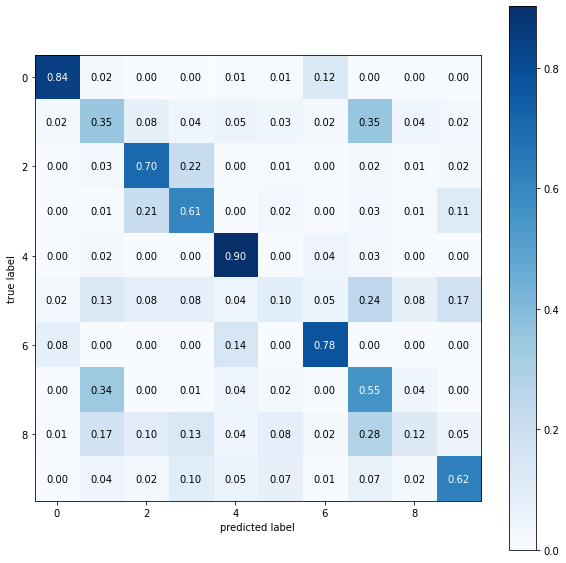

In [17]:
# PLOTTING NORMALIED CONFUSION MATRIX
figure, ax = plot_confusion_matrix(conf_mat = Corr_Matrix,
                                   show_absolute = False,
                                   show_normed = True,
                                   figsize = (10,10),
                                   colorbar = True )

plt.show()

In [18]:
# IMPORT SUPPORT VECTOR MACHINE AND METRICS TO SEE
from sklearn import svm, metrics

In [19]:
# DEFINE WHERE BEST ACCURACY WILL BE SAVED TO CHOOSE BEST CLASSIFIER
best_score = 0
scores = []
Corr_Matrix = np.zeros((10,10))

# FLATTEN IMAGES
digits = load_digits(n_class=10)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

for i in range(50):

  # SPLIT DATA INTO 50% TRAINING AND 50% TESTING
  X_train, X_test, y_train, y_test = train_test_split(
                                                  data, digits.target, 
                                                  test_size = 0.5, shuffle=False,
                                                  random_state = i )
  # CREATE SVM CLASSIFIER
  clf = svm.SVC(gamma=0.001)
  
  # TRAINING
  clf.fit(X_train, y_train)
  
  # SCORE ACCURACY OF CLASSIFIER
  score = clf.score(X_test, y_test)
  scores.append(score)

  if score > best_score:
    best_score = score
    best_clf = clf

  # GET PREDICTIONS
  predicted = clf.predict(X_test)
  
  # CONFUSION MATRIX COEFICIENTS
  corr = confusion_matrix(y_test, predicted)

  # ADD CONFUSION MATRIX WITH TOTAL VALUES
  Corr_Matrix += corr

output.clear()
print('FINISHED')

FINISHED


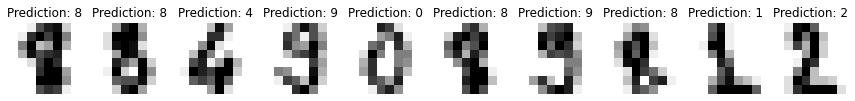

In [20]:
# SHOW PREDICTIONS AND IMAGE ITS CORRESPONDING ONE
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [21]:
print('Best Score: ', best_score)

Best Score:  0.9688542825361512


In [22]:
print('Mean Score: ', np.mean(scores))

Mean Score:  0.9688542825361511


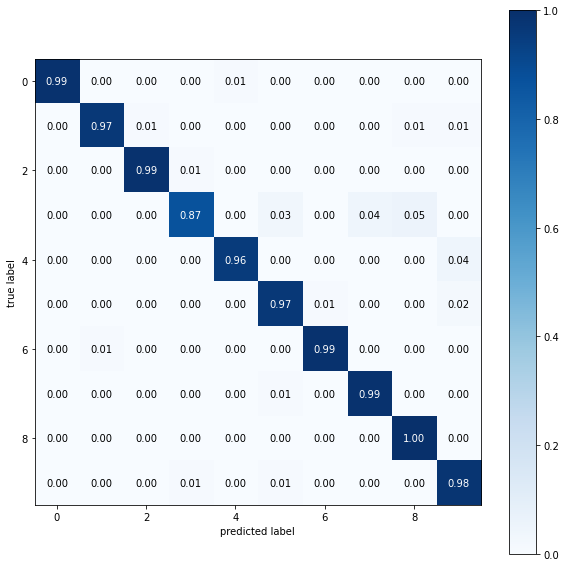

In [23]:
# PLOTTING NORMALIED CONFUSION MATRIX
figure, ax = plot_confusion_matrix(conf_mat = Corr_Matrix,
                                   show_absolute = False,
                                   show_normed = True,
                                   figsize = (10,10),
                                   colorbar = True )

plt.show()